# Zadanie 7.

In [1]:
import functools
import math

import matplotlib.pyplot as plt
import numpy as np

## Wczytywanie punktów (po usunięciu ostatniego wiersza)

In [2]:
points = np.genfromtxt('punkty.csv', delimiter=',')

In [3]:
f = lambda t: (t + 3.6) * (t - 2.1) * (t - 3.7)

## Wyznaczenie perfekcyjnej funkcji

In [134]:
t_min = np.min(points[:, 0])
t_max = np.max(points[:, 0])

In [135]:
perfect_x = np.linspace(t_min, t_max, 1_000)
perfect_y = f(perfect_x)

## Interpolacja

In [136]:
def interpolating_poly(t):
    x, y = points[:, 0], points[:, 1]
    
    return np.sum([
        y[j] * math.prod([
            ((t - x[m]) / (x[j] - x[m]))
            for m, _ in enumerate(points) if m != j
        ])
        for j, _ in enumerate(points)
    ])

In [137]:
interpolated_y = [
    interpolating_poly(x) for x in perfect_x
]

## Aproksymacja

In [6]:
def vecprod(f, g):
    return np.sum([
        f(x) * g(x) for x in points[:, 0]
    ])

In [7]:
vecprod(lambda a: a, lambda b: b)

413.273944

In [112]:
@functools.lru_cache(maxsize=4_000_000)
def polynomials_seq(upto):
    polys = {}
    
    @functools.lru_cache
    def _c(k):
        # return vecprod(lambda t: x * polys[k-1](t), polys[k-1]) / vecprod(polys[k-1], polys[k-1])
        # print(f'doing Ck for k = {k}')
        summed = 0
        for xk in points[:, 0]:
            summed += xk * polys[k-1](xk) * polys[k-1](xk)
        return summed / vecprod(polys[k-1], polys[k-1])
    
    @functools.lru_cache
    def _d(k):
        # print(f'doing Dk for k = {k}')
        return vecprod(polys[k-1], polys[k-1]) / vecprod(polys[k-2], polys[k-2])
    
    def _new_poly(k):
        return lambda x: (x - _c(k)) * polys[k-1](x) - _d(k) * polys[k-2](x)
    
    polys[0] = lambda x: 1
    polys[1] = lambda x: x - _c(1)
    
    for k in range(2, upto+1):
        polys[k] = _new_poly(k)
    
    return polys

In [113]:
def approx_poly(m, x):
    polys = polynomials_seq(m)
    
    _pseudo_f = lambda z: points[points[:, 0] == z][0][1]
    
    return np.sum([
        vecprod(_pseudo_f, polys[k]) / vecprod(polys[k], polys[k])
        * polys[k](x)
        for k in range(m+1)
    ])

In [126]:
approx_poly(3, -3)

20.48737655244677

In [127]:
approximated_x = np.linspace(t_min, t_max, 1000)

In [128]:
approximated_2_y = [approx_poly(2, x) for x in approximated_x]
approximated_2_y

[1.3858708426804895,
 1.4595460249958876,
 1.533071149436692,
 1.6064462160029152,
 1.67967122469455,
 1.7527461755115947,
 1.8256710684540565,
 1.8984459035219299,
 1.971070680715215,
 2.0435454000339153,
 2.115870061478036,
 2.1880446650475545,
 2.260069210742497,
 2.331943698562842,
 2.4036681285086114,
 2.4752425005797853,
 2.546666814776378,
 2.617941071098377,
 2.6890652695457966,
 2.7600394101186208,
 2.8308634928168654,
 2.9015375176405183,
 2.97206148458959,
 3.0424353936640696,
 3.112659244863961,
 3.1827330381892684,
 3.2526567736399876,
 3.3224304512161202,
 3.392054070917668,
 3.461527632744623,
 3.5308511366969952,
 3.6000245827747817,
 3.6690479709779753,
 3.737921301306587,
 3.80664457376061,
 3.875217788340046,
 3.943640945044896,
 4.011914043875158,
 4.080037084830832,
 4.148010067911924,
 4.215832993118429,
 4.283505860450342,
 4.3510286699076675,
 4.418401421490407,
 4.4856241151985605,
 4.552696751032125,
 4.619619328991105,
 4.6863918490754966,
 4.753014311285301,

In [129]:
approximated_3_y = [approx_poly(3, x) for x in approximated_x]
approximated_3_y

[-23.448756281564265,
 -22.932262541984773,
 -22.418330039232018,
 -21.906953756711395,
 -21.398128677828375,
 -20.8918497859884,
 -20.38811206459686,
 -19.88691049705924,
 -19.38824006678096,
 -18.892095757167453,
 -18.39847255162413,
 -17.907365433556535,
 -17.418769386369952,
 -16.93267939346998,
 -16.449090438261884,
 -15.967997504151253,
 -15.48939557454342,
 -15.013279632843906,
 -14.539644662458066,
 -14.06848564679141,
 -13.599797569249288,
 -13.133575413237248,
 -12.669814162160616,
 -12.208508799424902,
 -11.74965430843554,
 -11.293245672597937,
 -10.839277875317553,
 -10.3877458999998,
 -9.938644730050136,
 -9.49196934887401,
 -9.047714739876827,
 -8.605875886464027,
 -8.166447772041092,
 -7.729425380013401,
 -7.294803693786425,
 -6.862577696765592,
 -6.432742372356335,
 -6.005292703964103,
 -5.580223674994326,
 -5.157530268852426,
 -4.737207468943849,
 -4.319250258674057,
 -3.903653621448476,
 -3.4904125406725344,
 -3.0795219997516616,
 -2.670976982091317,
 -2.2647724710969

In [130]:
approximated_4_y = [approx_poly(4, x) for x in approximated_x]
approximated_4_y

[-23.459307497979534,
 -22.942465067215,
 -22.428187320195462,
 -21.916469223614826,
 -21.40730574420122,
 -20.900691848716917,
 -20.396622503958287,
 -19.89509267675596,
 -19.396097333974662,
 -18.89963144251329,
 -18.40568996930488,
 -17.914267881316757,
 -17.425360145550155,
 -16.938961729040777,
 -16.455067598858154,
 -15.973672722106299,
 -15.494772065923133,
 -15.01836059748092,
 -14.54443328398592,
 -14.072985092678715,
 -13.604010990833876,
 -13.137505945760338,
 -12.673464924800976,
 -12.211882895333005,
 -11.752754824767727,
 -11.296075680550574,
 -10.841840430161193,
 -10.390044041113347,
 -9.940681480954996,
 -9.493747717268262,
 -9.049237717669373,
 -8.60714644980876,
 -8.16746888137105,
 -7.730199980074932,
 -7.295334713673346,
 -6.862868049953347,
 -6.432794956736157,
 -6.005110401877173,
 -5.579809353265935,
 -5.1568867788261326,
 -4.736337646515642,
 -4.318156924326514,
 -3.902339580284924,
 -3.48888058245121,
 -3.0777748989198708,
 -2.6690174978195955,
 -2.26260334731

In [131]:
approximated_5_y = [approx_poly(5, x) for x in approximated_x]
approximated_5_y

[-23.462205197808274,
 -22.945208856350213,
 -22.430779628675282,
 -21.918912461030487,
 -21.409602299791715,
 -20.902844091463454,
 -20.398632782678543,
 -19.89696332019817,
 -19.39783065091148,
 -18.901229721835485,
 -18.40715548011483,
 -17.915602873021736,
 -17.42656684795546,
 -16.94004235244262,
 -16.4560243341364,
 -15.974507740816986,
 -15.495487520390808,
 -15.018958620890784,
 -14.544915990475774,
 -14.073354577430718,
 -13.604269330166108,
 -13.137655197218171,
 -12.673507127248252,
 -12.211820069043018,
 -11.75258897151402,
 -11.295808783697534,
 -10.841474454754456,
 -10.389580933970015,
 -9.940123170753655,
 -9.493096114638806,
 -9.048494715282645,
 -8.606313922465988,
 -8.166548686093098,
 -7.729193956191353,
 -7.2942446829112475,
 -6.86169581652606,
 -6.4315423074317115,
 -6.003779106146582,
 -5.578401163311286,
 -5.155403429688486,
 -4.734780856162736,
 -4.316528393740276,
 -3.900640993548789,
 -3.4871136068372492,
 -3.0759411849757243,
 -2.667118679455212,
 -2.2606410

In [132]:
approximated_6_y = [approx_poly(6, x) for x in approximated_x]
approximated_6_y

[-23.44874789869117,
 -22.932903297814768,
 -22.419598270904846,
 -21.908828120401346,
 -21.400588146096226,
 -20.894873645145676,
 -20.391679912082356,
 -19.89100223882782,
 -19.39283591470456,
 -18.897176226448323,
 -18.404018458220243,
 -17.913357891619125,
 -17.425189805693233,
 -16.939509476952928,
 -16.456312179382106,
 -15.975593184450924,
 -15.497347761127235,
 -15.021571175889038,
 -14.5482586927361,
 -14.077405573202237,
 -13.60900707636691,
 -13.143058458867499,
 -12.679554974910756,
 -12.218491876285052,
 -11.759864412371957,
 -11.303667830158071,
 -10.849897374246893,
 -10.39854828687047,
 -9.949615807901196,
 -9.503095174863477,
 -9.058981622945355,
 -8.617270385010244,
 -8.177956691608543,
 -7.741035770989114,
 -7.306502849111022,
 -6.874353149654963,
 -6.4445818940348225,
 -6.017184301409186,
 -5.592155588692777,
 -5.169490970567907,
 -4.749185659495927,
 -4.33123486572862,
 -3.9156337973195043,
 -3.5023776601352297,
 -3.0914616578668834,
 -2.6828809920413144,
 -2.27663

## Wykresy

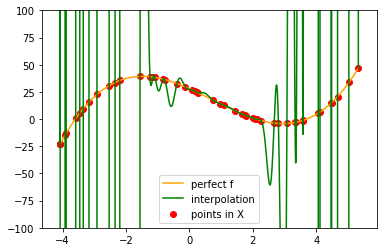

In [138]:
plt.ylim((-100, 100))

plt.plot(perfect_x, perfect_y, c='orange', label='perfect f')
plt.plot(perfect_x, interpolated_y, c='green', label='interpolation')
plt.scatter(points[:, 0], points[:, 1], c='red', label='points in X')

plt.legend()

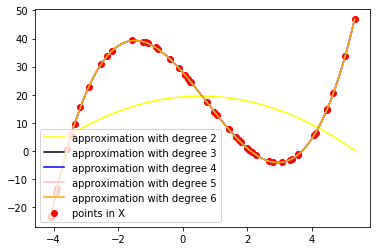

In [142]:
plt.scatter(points[:, 0], points[:, 1], c='red', label='points in X')
plt.plot(approximated_x, approximated_2_y, c='yellow', label='approximation with degree 2')
plt.plot(approximated_x, approximated_3_y, c='black', label='approximation with degree 3')
plt.plot(approximated_x, approximated_4_y, c='blue', label='approximation with degree 4')
plt.plot(approximated_x, approximated_5_y, c='pink', label='approximation with degree 5')
plt.plot(approximated_x, approximated_6_y, c='orange', label='approximation with degree 6')

plt.legend()

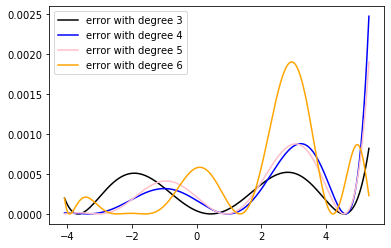

In [146]:
#plt.plot(
#    approximated_x, (perfect_y - approximated_2_y) ** 2, c='yellow',
#    label='error with degree 2')
plt.plot(
    approximated_x, (perfect_y - approximated_3_y) ** 2, c='black',
    label='error with degree 3')
plt.plot(
    approximated_x, (perfect_y - approximated_4_y) ** 2, c='blue',
    label='error with degree 4')
plt.plot(
    approximated_x, (perfect_y - approximated_5_y) ** 2, c='pink',
    label='error with degree 5')
plt.plot(
    approximated_x, (perfect_y - approximated_6_y) ** 2, c='orange',
    label='error with degree 6')

plt.legend()

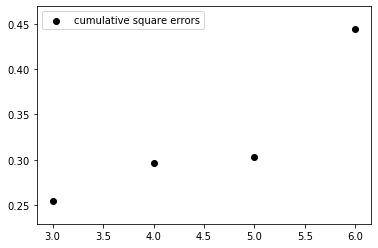

In [155]:
plt.scatter([3, 4, 5, 6], [
    np.sum((perfect_y - approximated_3_y) ** 2),
    np.sum((perfect_y - approximated_4_y) ** 2),
    np.sum((perfect_y - approximated_5_y) ** 2),
    np.sum((perfect_y - approximated_6_y) ** 2)
], color='black', label='cumulative square errors')

plt.legend()